# Practical Machine Learning for Physicists


For both of these tasks we want you to implement autoencoder networks that:
- Train on randomly generated circles (using the circle_generator function below)
- Use 27x27 pixel images
- Use no more than 30,000 randomly generated samples (e.g. batchsize 30 and 1000 steps, or batchsize 1000 and 30 steps, or anywhere inbetween) in training the final networks for each task
- Use the mean_squared_error loss function
- Fulfil the network size requirement listed in the task (can be verifired using the print_layers function, after the network is partially trained)

### Task 1:
Implement any network design, but the bottleneck must contain no more than 9 neurons.

### Task 2:
Implement any network design, but the bottleneck must contain no more than 3 neurons.



#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these tasks. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Task 1 performance (0.02 is a good target cost to do better than)
- Task 2 performance ( a good target here is left for the student to determine)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

In [2]:
#A big messy function to do the training
# model -- our keras neural model autoencoder
# image_generator -- a function to generate random images for the training (see below for examples)
# img_size -- the size of our image in pixels
# batchsize -- the number of images to include in each training batch
# steps -- the number of steps taken in the training
#
# returns an array of the costs
def generate_and_train(model,image_generator,img_size,batchsize,steps):
   
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them    
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)
    
    #Now create a test image using 1 call to image_generator
    #y_test=np.zeros([1,pixels,pixels,1])
    #y_test[:,:,:,0]=image_generator(1,x,y)
    
    #Now create the empty arrays for the images and cost
    y_in=np.zeros([batchsize,img_size,img_size,1])
    y_target=np.zeros([batchsize,img_size,img_size,1])
    cost=np.zeros(steps)
    
    #Loop through the steps, get a random batch of samples, train the model, repeat
    for k in range(steps):
        # produce samples:
        y_in[:,:,:,0]=image_generator(batchsize,x,y)
        y_target=np.copy(y_in) # autoencoder wants to reproduce its input!
        
        # do one training step on this batch of samples:
        cost[k]=model.train_on_batch(y_in,y_target)
    
    return cost,y_target

def get_test_image(image_generator,img_size):
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them    
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)
    
    #Now create a test image using 1 call to image_generator
    y_test=np.zeros([1,img_size,img_size,1])
    y_test[:,:,:,0]=image_generator(1,x,y)
    return y_test

# A function to generate and plot a single test image and the output of our model
# only to be called after training the model
def plot_test_image(model,image_generator,img_size):
    #Get random test image
    y_test=get_test_image(image_generator,img_size)
    
    #Create the output image
    y_test_out=model.predict_on_batch(y_test)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(y_test[0,:,:,0],origin='lower')
    ax[0].set_title("Input")
    ax[1].imshow(y_test_out[0,:,:,0],origin='lower')
    ax[1].set_title("Output")
    
def print_layers(network, y_in):
    """
    Call this on some test images y_in, to get a print-out of
    the layer sizes. Shapes shown are (batchsize,pixels,pixels,channels).
    After a call to the visualization routine, y_target will contain
    the last set of training images, so you could feed those in here.
    """
    layer_features=get_layer_activations(network,y_in)
    #print(layer_features)
    for idx,feature in enumerate(layer_features):
        s=np.shape(feature)
        print("Layer "+str(idx)+": "+str(s[1]*s[2]*s[3])+" neurons / ", s)

def get_layer_activation_extractor(network):
    #print(network.inputs)
    #for layer in network.layers:
    #    print(layer.output)
    return(keras.Model(inputs=network.inputs,
                            outputs=[layer.output for layer in network.layers]))

def get_layer_activations(network, y_in):
    """
    Call this on some test images y_in, to get the intermediate 
    layer neuron values. These are returned in a list, with one
    entry for each layer (the entries are arrays).
    """
    extractor=get_layer_activation_extractor(network)
    #print(extractor)
    layer_features = extractor(y_in)
    return layer_features
    

## Circle generator


In [3]:
# A simple image generator that returns an array of batchsize images
# each image has a size of x * y pixels
# in this image each image has a randomly placed circle (and the circle is of random size)
def circle_generator(batchsize,x,y):
    R=np.random.uniform(size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-1,high=1)
    y0=np.random.uniform(size=batchsize,low=-1,high=1)
    return( 1.0*((x[None,:,:]-x0[:,None,None])**2 + (y[None,:,:]-y0[:,None,None])**2 < R[:,None,None]**2) )


# Task 1:

Creating an autoencoder model with the purpose of replicating a randomly generated 27x27 pixel circle using a bottleneck consisting of no more than 9 neurons.

0.009827881120145321
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 21, 21, 27)        1350      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 27)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 16)          21184     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 1)           145       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 9, 9, 1)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (Non

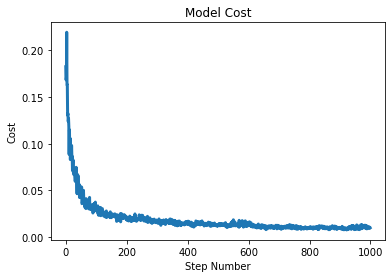

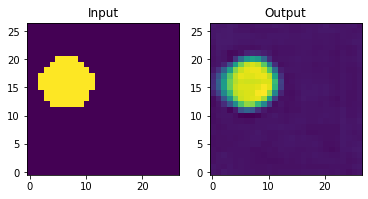

In [6]:
# Set up the model # 10 layers

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(27,kernel_size=7,activation='relu',input_shape=(27,27,1))) 
# Down
model.add(keras.layers.MaxPool2D(pool_size=(3,3),padding='same')) 
model.add(keras.layers.Conv2D(16,kernel_size=7,padding='same',activation='relu')) 
# Down
model.add(keras.layers.MaxPool2D(pool_size=(3,3),padding='same'))
model.add(keras.layers.Conv2D(1,3,
                              activation="relu",padding='same'))
# Up
model.add(keras.layers.UpSampling2D(size=(3,3))) 
model.add(keras.layers.Conv2D(16,kernel_size=7,
                              activation="relu",padding='same')) 
# Up
model.add(keras.layers.UpSampling2D(size=(3,3))) 
model.add(keras.layers.Conv2D(27,kernel_size=7,
                activation="relu",padding='same'))
model.add(keras.layers.Conv2D(1,3,activation="linear",padding='same'))

model.compile(loss='mean_squared_error', optimizer='adam')

# Plot the cost function of the model

cost,y_target=generate_and_train(model,circle_generator,img_size=9*3,batchsize=30,steps=1000) 

fig, ax = plt.subplots()
stepArray=np.arange(1000)
ax.plot(stepArray,cost,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel("Cost")
plt.title('Model Cost')
print(cost[-1])

# Plot images

plot_test_image(model, circle_generator, 27)

# Output important values describing the model

model.summary()

print_layers(model,y_target)

This is a 10 layer model consisting of a 9-neuron bottleneck and a cost function of 0.00977821834385395, which is below the required 0.02 stated in the task prompt. The cost plot cleanly indicates a standard cost function decrease as the step number increases (30,000 samples used as stated as the limit). The image plots clearly display that the model was able to, with confidence, recreate a closely resembling image of the 'input' circle.

# Task 2:

In order to ensure that as much information required to replicate the image can be encoded in 'latent space' as possible, it's important that the neurons per layer do not converge on 3 too abruptly i.e. it isn't ideal to have an incredibly large neuron difference between the bottleneck and the adjacent layers because the bottleneck won't be able to 'encode' efficiently i.e. it would be overloaded with information. It would be sensible to insert additional layers to graduate the neuron reduction so that one layer of incredibly low neuron count is not tasked with encoding a triple digit+ adjacent layer. A cost value of around factor 3 higher than that of the previous model would be an ideal target (0.0293) considering the factor 3 reduction in information capacity.

0.02699505351483822
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 23, 23, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 12)          4812      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 12)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 3)           327       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 3)           0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None

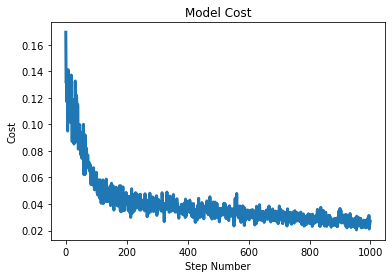

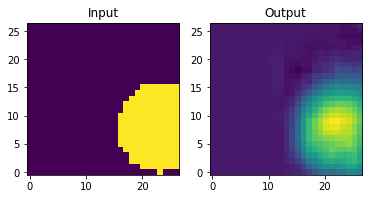

In [5]:
# Set up the model # 12 layers

model2 = keras.models.Sequential()

model2.add(keras.layers.Conv2D(16,kernel_size=5,activation='relu',input_shape=(27,27,1))) 
# Down
model2.add(keras.layers.MaxPool2D(pool_size=(3,3),padding='same')) 
model2.add(keras.layers.Conv2D(12,kernel_size=5,padding='same',activation='relu'))
# Down
model2.add(keras.layers.MaxPool2D(pool_size=(3,3),padding='same'))
model2.add(keras.layers.Conv2D(3,kernel_size=3,
                               activation="relu",padding='same'))
# Down
model2.add(keras.layers.MaxPool2D(pool_size=(3,3),padding='same'))
# Up
model2.add(keras.layers.UpSampling2D(size=(3,3)))
model2.add(keras.layers.Conv2D(12,kernel_size=3,
                               activation="relu",padding='same'))
# Up
model2.add(keras.layers.UpSampling2D(size=(3,3)))
model2.add(keras.layers.Conv2D(16,kernel_size=5,
                               activation="relu",padding='same'))
# Up
model2.add(keras.layers.UpSampling2D(size=(3,3)))
model2.add(keras.layers.Conv2D(1,kernel_size=5,activation="linear",padding='same'))

model2.compile(loss='mean_squared_error', optimizer='adam')

# Plot the cost function of the model

cost2,y_target2=generate_and_train(model2,circle_generator,img_size=9*3,batchsize=30,steps=1000)

fig, ax = plt.subplots()
stepArray=np.arange(1000)
ax.plot(stepArray,cost2,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel("Cost")
plt.title('Model Cost')
print(cost2[-1])

# Plot image

plot_test_image(model2,circle_generator,27)

# Output important values describing the model

model2.summary()

print_layers(model2,y_target2)

The bottleneck consisted of 3 neurons. This 3-neuron bottleneck model consists of 15,902 fewer total / trainable parameters than the previous model. This, in addition to the fact that 3 times less information can be 'stored' / encoded at the bottleneck axiomatically yields reasons as to why the cost function of this model is higher than the previous one, close to factor 3 higher. The image clearly lacks the accuracy of the previous model with the boundaries not being as clearly defined and so a cost function approximately (less than) factor 3 larger (0.02699505351483822) than that of the previous function is a success considering the reduction in neuron and thus information capacity at the bottleneck.